In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics
import matplotlib.pyplot as plt
import seaborn as sns

## Multivariate Linear Regression
**Soal**

Train a multivariate linear regression model for this data and shows the result & evaluation.\
● Take dataset: train.csv\
● One Hot Encoding, Fill NA\
● Separate into X_train, X_test, y_train, y_test (y = “SalePrice”) with proportion: 60-40\
● Train regression model with X_train and y_train\
● Evaluate the result with 3 metrics\
● Explain or Interpret the linear correlation between 3 features and the target (“SalePrice”)\

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

**Handle for Missing Value**

1. Drop The Column

In [3]:
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 'columns', inplace = True)

2. Fill the Missing Value with Mean/Median/Mode

In [4]:
df_update = df.copy()
df_update['LotFrontage'] = df_update['LotFrontage'].fillna(df_update['LotFrontage'].mean())
df_update['MasVnrType'] = df_update['MasVnrType'].fillna(df_update['MasVnrType'].mode()[0])
df_update['MasVnrArea'] = df_update['MasVnrArea'].fillna(df_update['MasVnrArea'].mode()[0])
df_update['BsmtQual'] = df_update['BsmtQual'].fillna(df_update['BsmtQual'].mode()[0])
df_update['BsmtCond'] = df_update['BsmtCond'].fillna(df_update['BsmtCond'].mode()[0])
df_update['BsmtExposure'] = df_update['BsmtExposure'].fillna(df_update['BsmtExposure'].mode()[0])
df_update['BsmtFinType1'] = df_update['BsmtFinType1'].fillna(df_update['BsmtFinType1'].mode()[0])
df_update['BsmtFinType2'] = df_update['BsmtFinType2'].fillna(df_update['BsmtFinType2'].mode()[0])
df_update['Electrical'] = df_update['Electrical'].fillna(df_update['Electrical'].mode()[0])
df_update['GarageType'] = df_update['GarageType'].fillna(df_update['GarageType'].mode()[0])
df_update['GarageYrBlt'] = df_update['GarageYrBlt'].fillna(df_update['GarageYrBlt'].mode()[0])
df_update['GarageFinish'] = df_update['GarageFinish'].fillna(df_update['GarageFinish'].mode()[0])
df_update['GarageCond'] = df_update['GarageCond'].fillna(df_update['GarageCond'].mode()[0])

In [5]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

**One Hot Encoding**

In [6]:
# One Hot Encoding
df1 = pd.get_dummies(df_update)
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [21]:
# defining feature matrix(X) and response vector(y)
X = df1.drop(['Id', 'SalePrice'], axis = 1)
y = df1['SalePrice']

In [22]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

Modelling Linear Regression

In [9]:
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

print('Coefficients: ', reg.coef_)

print('Intercept: ', reg.intercept_)

Coefficients:  [-1.65944964e+02  4.55218397e+01  1.06910441e+00  4.90962879e+03
  6.08217484e+03  2.49125904e+02  2.50321747e+01  1.32853307e+01
  1.87934101e+01  5.81227932e-01 -3.06311836e+00  1.63115041e+01
  1.92395423e+01  2.73010674e+01 -1.02151767e+01  3.63254521e+01
 -8.54786743e+02  1.11387481e+03  3.74040002e+03  2.23670104e+03
 -1.81263279e+03 -1.09730473e+04 -7.93274844e+01  2.42138329e+03
 -1.44790148e+01  5.14659441e+03  1.64977357e+01  7.01663643e+00
  2.51464156e+01 -3.14332657e+00  1.94362167e+01  1.77375659e+01
  4.33620578e+01  5.72581822e-01 -3.08192588e+02 -6.92975154e+02
 -3.70484423e+04  1.77117167e+04  1.66759819e+04  1.14929633e+03
  1.51144744e+03  1.14656979e+03 -1.14656979e+03  1.87493128e+03
  7.75549998e+02 -5.65075090e+03  3.00026962e+03  2.82821990e+02
  1.15261375e+04 -1.68834287e+04  5.07446919e+03  2.58415204e+04
 -2.58415204e+04  1.84149526e+03  7.06658288e+03 -6.77615017e+02
 -7.17520936e+03 -1.05525376e+03  2.44668048e+04  2.60386647e+04
 -5.050546

Variance score Test: 0.7172074481983635
Variance score Train: 0.9455066811115352


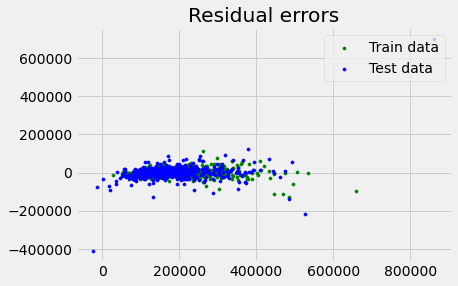

In [10]:
 # variance score: 1 means perfect prediction
print('Variance score Test: {}'.format(reg.score(X_test, y_test)))
print('Variance score Train: {}'.format(reg.score(X_train, y_train)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

### Evaluation

In [39]:
y_pred = reg.predict(X_test)

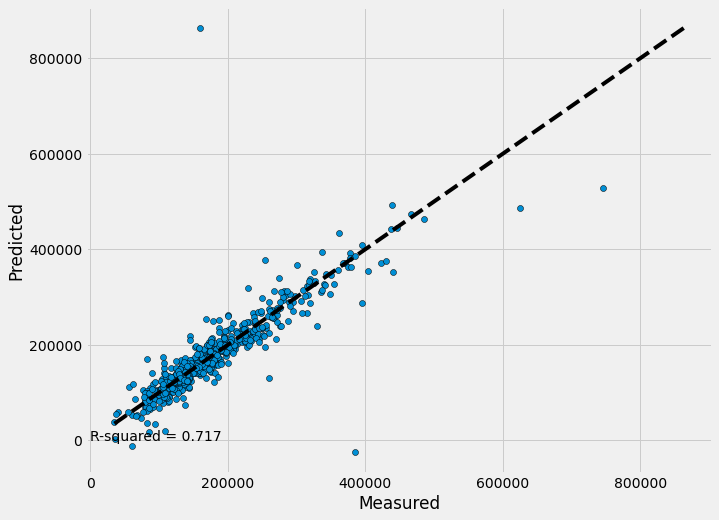

In [98]:
y_pred = reg.predict(X_test)

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_pred.max()], [y_test.min(), y_pred.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")

R2=r2_score(y_test, y_pred)
plt.text(1, 0.5, 'R-squared = %0.3f' % R2)

plt.show()

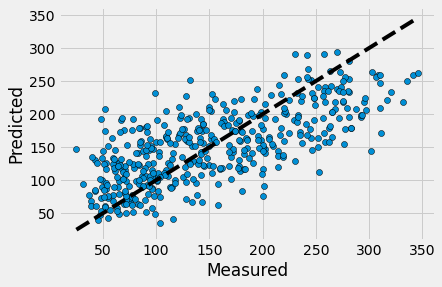

In [75]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

lr = linear_model.LinearRegression()
X, y = datasets.load_diabetes(return_X_y=True)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(reg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [84]:
# Mean Absolute Errors

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

# Mean Square Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

# Root Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

# R Squared
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

print("Nilai Mean Absolute Errors (MAE) adalah", mean_absolute_error(y_test, y_pred))
print("Nilai Mean Square Error (MSE) adalah", mean_squared_error(y_test, y_pred))
print("Nilai Root Mean Squared Error (RMSE) adalah", mean_squared_error(y_test, y_pred, squared=False))
print("Nilai R Squared (R2) adalah", r2_score(y_test, y_pred))

Nilai Mean Absolute Errors (MAE) adalah 20094.359091586986
Nilai Mean Square Error (MSE) adalah 1869139186.2051773
Nilai Root Mean Squared Error (RMSE) adalah 43233.54237400837
Nilai R Squared (R2) adalah 0.7172074481983635


### Linear Correlation Between 3 features

In [23]:
correlations = df1.corr()['SalePrice'].sort_values()

print('Most Positive Correlations: \n', correlations.tail(4))
print('\nMost Negative Correlations: \n', correlations.head(3))

Most Positive Correlations: 
 GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
SalePrice      1.000000
Name: SalePrice, dtype: float64

Most Negative Correlations: 
 ExterQual_TA       -0.589044
KitchenQual_TA     -0.519298
GarageFinish_Unf   -0.513906
Name: SalePrice, dtype: float64


3 features yang memiliki korelasi paling positif yaitu: **OverallQual**, **GrLiveArea**, dan **GarageCars**

In [24]:
df_corr = df1[['SalePrice','ExterQual_TA','KitchenQual_TA','GarageFinish_Unf','GarageCars', 'GrLivArea', 'OverallQual']]
df_data_corrs = df_corr.corr()
df_data_corrs

,SalePrice,ExterQual_TA,KitchenQual_TA,GarageFinish_Unf,GarageCars,GrLivArea,OverallQual
SalePrice,1.000000,-0.589044,-0.519298,-0.513906,0.640409,0.708624,0.790982
ExterQual_TA,-0.589044,1.000000,0.671600,0.515582,-0.481825,-0.386146,-0.646247
KitchenQual_TA,-0.519298,0.671600,1.000000,0.410758,-0.399449,-0.350179,-0.553891
GarageFinish_Unf,-0.513906,0.515582,0.410758,1.000000,-0.481751,-0.317842,-0.537152
GarageCars,0.640409,-0.481825,-0.399449,-0.481751,1.000000,0.467247,0.600671
GrLivArea,0.708624,-0.386146,-0.350179,-0.317842,0.467247,1.000000,0.593007
OverallQual,0.790982,-0.646247,-0.553891,-0.537152,0.600671,0.593007,1.000000


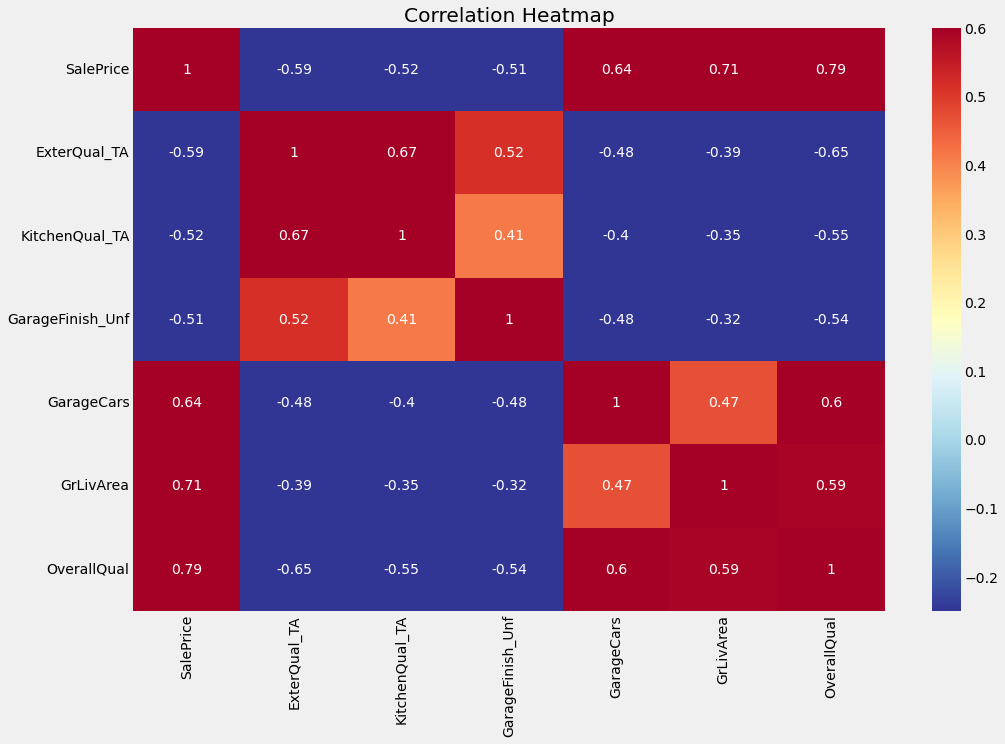

In [25]:
plt.figure(figsize = (15, 10))

sns.heatmap(df_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

plt.title('Correlation Heatmap');

## Classification

**Soal**

Train two models: logistic regression and random forest for this data and shows the result &
evaluation.\
● Take dataset: heart.csv\
● One Hot Encoding\
● Separate into X_train, X_test, y_train, y_test (y = “HeartDisease”) with proportion: 60-40\
● Train two models with X_train and y_train (use Hyperparameter Tuning for random forest)\
● Evaluate the result with confusion matrix, classification report, and AUC\
● Which model is better at predicting Heart Disease? Interpret the reason.\

In [26]:
df2=pd.read_csv('heart.csv')
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Dari tipe data, diketahui bahwa beberapa data termasuk type 'object' sehingga perlu kita rubah terlebih dahulu

In [28]:
num_cols = df2[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]]
cat_cols = df2[["Sex","ChestPainType","FastingBS","RestingECG","ExerciseAngina","ST_Slope","HeartDisease"]]
for col in cat_cols.columns:
    cat_cols[col] = cat_cols[col].astype("category")
df = pd.concat([num_cols,cat_cols], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   RestingBP       918 non-null    int64   
 2   Cholesterol     918 non-null    int64   
 3   MaxHR           918 non-null    int64   
 4   Oldpeak         918 non-null    float64 
 5   Sex             918 non-null    category
 6   ChestPainType   918 non-null    category
 7   FastingBS       918 non-null    category
 8   RestingECG      918 non-null    category
 9   ExerciseAngina  918 non-null    category
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(1), int64(4)
memory usage: 43.2 KB


C:\Users\REYNAL~1\AppData\Local\Temp/ipykernel_23804/1137580817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cols[col] = cat_cols[col].astype("category")


In [29]:
df2["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Jumlah label tidak seimbang, solusinya adalah dengan melakukan resampling

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

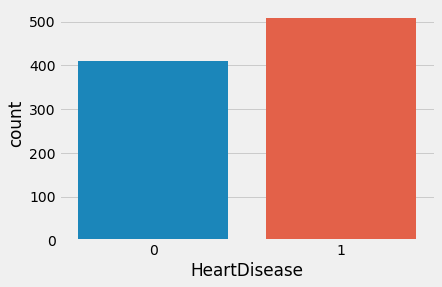

In [30]:
sns.countplot(df2["HeartDisease"])

In [31]:
from sklearn.utils import resample

df2_majority = df2[(df2['HeartDisease']==1)] 
df2_minority = df2[(df2['HeartDisease']==0)] 
# upsample minority class
df2_minority_upsampled = resample(df2_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 508, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df2 = pd.concat([df2_minority_upsampled, df2_majority])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

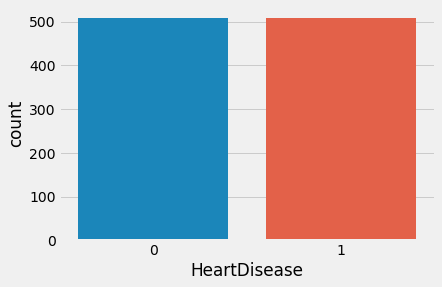

In [32]:
sns.countplot(df2["HeartDisease"])

In [33]:
#One Hot Encoding
df2 = pd.get_dummies(df2)
df2.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
164,52,140,225,0,140,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
802,52,108,233,1,147,0.1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,1
657,44,130,233,0,179,0.4,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
170,29,120,243,0,160,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
110,59,130,188,0,124,1.0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


In [34]:
# defining feature matrix(X) and response vector(y)
X = df2.loc[:, df2.columns != 'HeartDisease']
y = df2["HeartDisease"]

In [35]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [36]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000)
lr = lr.fit(X_train, y_train)

In [51]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [52]:
#Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [53]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [54]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [41]:
grid_search.best_score_

0.8999290505675954

In [42]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

### Evaluation

In [43]:
y_lr = lr.predict(X_test)
y_rf = rf_best.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
print("Akurasi dari model Logistic Regression adalah", accuracy_score(y_test, y_lr))
print("Akurasi dari model RandomForest adalah",accuracy_score(y_test, y_rf))

Akurasi dari model Logistic Regression adalah 0.8869778869778869
Akurasi dari model RandomForest adalah 0.9041769041769042


In [45]:
from sklearn.metrics import precision_score
print("Presisi dari model Logistic Regression adalah", precision_score(y_test, y_lr, average='macro'))
print("Presisi dari model RandomForest adalah",precision_score(y_test, y_rf, average='macro'))

Presisi dari model Logistic Regression adalah 0.8870313103981445
Presisi dari model RandomForest adalah 0.9041908212560387


In [46]:
from sklearn.metrics import confusion_matrix
print("Confusion matris=x dari model Logistic Regression adalah",confusion_matrix(y_test, y_lr))
print("Confusion matris=x dari model RandomForest adalah",confusion_matrix(y_test, y_rf))

Confusion matris=x dari model Logistic Regression adalah [[177  24]
 [ 22 184]]
Confusion matris=x dari model RandomForest adalah [[181  20]
 [ 19 187]]


In [47]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print("AUC = ", auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print("AUC = ", auc(fpr, tpr))

AUC =  0.8869004492102593
AUC =  0.9041322513645366


In [48]:
from sklearn.metrics import classification_report
print("Report Logistic Regression")
print(classification_report(y_test, y_lr))
print("Report Random Forest")
print(classification_report(y_test, y_rf))

Report Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       201
           1       0.88      0.89      0.89       206

    accuracy                           0.89       407
   macro avg       0.89      0.89      0.89       407
weighted avg       0.89      0.89      0.89       407

Report Random Forest
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       201
           1       0.90      0.91      0.91       206

    accuracy                           0.90       407
   macro avg       0.90      0.90      0.90       407
weighted avg       0.90      0.90      0.90       407



Dari perbandingan hasil pemodelan tersebut, dapat dilihat bahwa kedua model dapat dengan baik memodelkan dataset, namun dari hasil evaluasi menunjukan bahwa untuk model RandomForest lebih baik dari Logistic Regression

In [49]:
import pickle

In [50]:
pickle.dump(rf, open('modelfp3.pkl','wb'))